# AI PROJECT

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alik05/forest-fire-dataset

 99% 141M/142M [00:05<00:00, 37.4MB/s]
100% 142M/142M [00:05<00:00, 25.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/forest-fire-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Constants
IMAGE_WIDTH, IMAGE_HEIGHT = 128, 128
BATCH_SIZE = 16  # You may need to adjust this based on the performance

# Define ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 20% of the data for validation
)

# Flow training images from directory
train_generator = train_datagen.flow_from_directory(
    '/content/Forest Fire Dataset/Training',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'  # Specify subset as 'training'
)

# Flow validation images from directory
validation_generator = train_datagen.flow_from_directory(
    '/content/Forest Fire Dataset/Training',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'  # Specify subset as 'validation'
)

# # Data preparation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# validation_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# train_generator = train_datagen.flow_from_directory(
#     '/content/Forest Fire Dataset/Training',  # Replace with the path to your training dataset
#     target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
#     batch_size=BATCH_SIZE,
#     class_mode='binary'
# )

# validation_generator = validation_datagen.flow_from_directory(
#     '/content/Forest Fire Dataset/Training',  # Replace with the path to your validation dataset
#     target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
#     batch_size=BATCH_SIZE,
#     class_mode='binary'
# )

for data, labels in train_generator:
    print("data shape = ",data.shape, labels.shape)
    break  # Just to see one batch


model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))  # Sigmoid for binary classification

model.summary()

Found 1216 images belonging to 2 classes.
Found 304 images belonging to 2 classes.
data shape =  (16, 128, 128, 3) (16,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

import math

# Assuming train_generator and validation_generator are already defined
train_steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)
history = model.fit(
    train_generator,
    epochs=25,  # Specify the total number of epochs
    validation_data=validation_generator
)

# Save model
model.save('forestfire_detection_model.h5')

Epoch 1/25
76/76 [==============================] - 16s 128ms/step - loss: 0.3668 - accuracy: 0.8668 - val_loss: 0.1691 - val_accuracy: 0.9737
Epoch 2/25
76/76 [==============================] - 10s 130ms/step - loss: 0.2030 - accuracy: 0.9317 - val_loss: 0.1263 - val_accuracy: 0.9770
Epoch 3/25
76/76 [==============================] - 10s 127ms/step - loss: 0.1741 - accuracy: 0.9433 - val_loss: 0.1146 - val_accuracy: 0.9803
Epoch 4/25
76/76 [==============================] - 10s 126ms/step - loss: 0.1692 - accuracy: 0.9400 - val_loss: 0.1405 - val_accuracy: 0.9704
Epoch 5/25
76/76 [==============================] - 10s 128ms/step - loss: 0.1671 - accuracy: 0.9367 - val_loss: 0.1061 - val_accuracy: 0.9737
Epoch 6/25
76/76 [==============================] - 9s 115ms/step - loss: 0.1573 - accuracy: 0.9383 - val_loss: 0.1139 - val_accuracy: 0.9671
Epoch 7/25
76/76 [==============================] - 10s 131ms/step - loss: 0.1922 - accuracy: 0.9309 - val_loss: 0.1759 - val_accuracy: 0.9605


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt

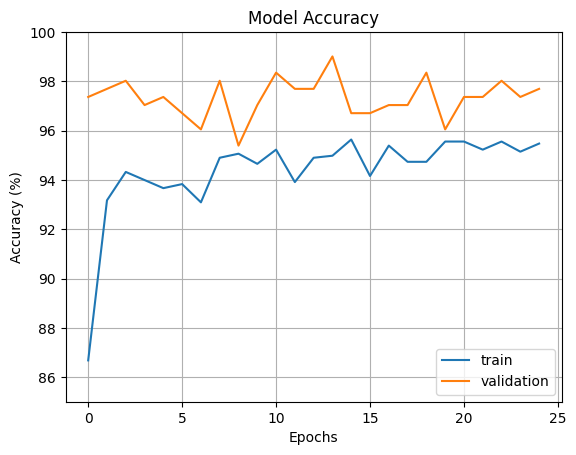

In [ ]:
fig1 = plt.gcf()
plt.plot([acc * 100 for acc in history.history['accuracy']])
plt.plot([val_acc * 100 for val_acc in history.history['val_accuracy']])
plt.axis(ymin=85, ymax=100)  # Set y-axis scale from 80 to 100
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

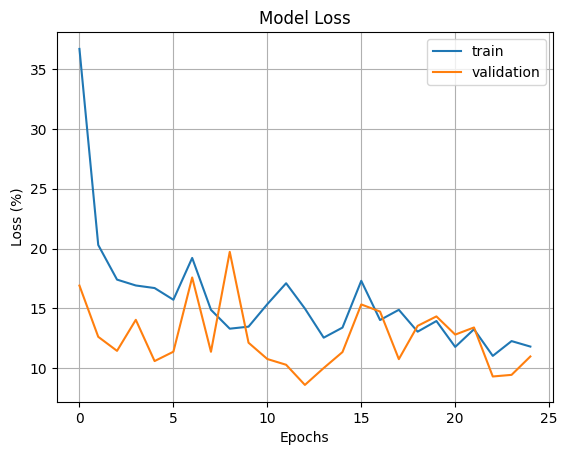

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.plot([loss * 100 for loss in history.history['loss']])
plt.plot([val_loss * 100 for val_loss in history.history['val_loss']])
# plt.axis(ymin=85, ymax=100)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss (%)')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Organize Testing data

In [ ]:
!mkdir -p "/content/Forest Fire Dataset/Testing/fire"
!mkdir -p "/content/Forest Fire Dataset/Testing/nofire"

In [ ]:
import os

# Define the folder path
folder_path = "/content/Forest Fire Dataset/Testing"

# List all files in the folder
# all_files = os.listdir(folder_path)
all_files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]


# Separate files starting with "fire" and "nofire"
fire_files = [file for file in all_files if file.startswith("fire")]
nofire_files = [file for file in all_files if file.startswith("nofire")]

# Print the list of files starting with "fire"
# print("Files starting with 'fire':")
# for file in fire_files:
#     print(file)

# # Print the list of files starting with "nofire"
# print("\nFiles starting with 'nofire':")
# for file in nofire_files:
#     print(file)

import shutil
import os

# Define source and destination folders
source_folder = "/content/Forest Fire Dataset/Testing"
destination_folder = "/content/Forest Fire Dataset/Testing/fire"
destination_folder2 = "/content/Forest Fire Dataset/Testing/nofire"

# List files in the source folder
files_to_transfer1 = fire_files

# Transfer files one by one
for file in files_to_transfer1:
    # Construct paths for the source and destination files
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(destination_folder, file)

    # Transfer the file
    shutil.move(source_path, destination_path)
    # print(f"Transferred {file} to {destination_folder}")


# List files in the source folder
files_to_transfer2 = nofire_files

# Transfer files one by one
for file in files_to_transfer2:
    # Construct paths for the source and destination files
    source_path = os.path.join(source_folder, file)
    destination_path2 = os.path.join(destination_folder2, file)

    # Transfer the file
    shutil.move(source_path, destination_path2)
    # print(f"Transferred {file} to {destination_folder}")

# Confusion matrix

Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
24/24 [==============================] - 1s 39ms/step


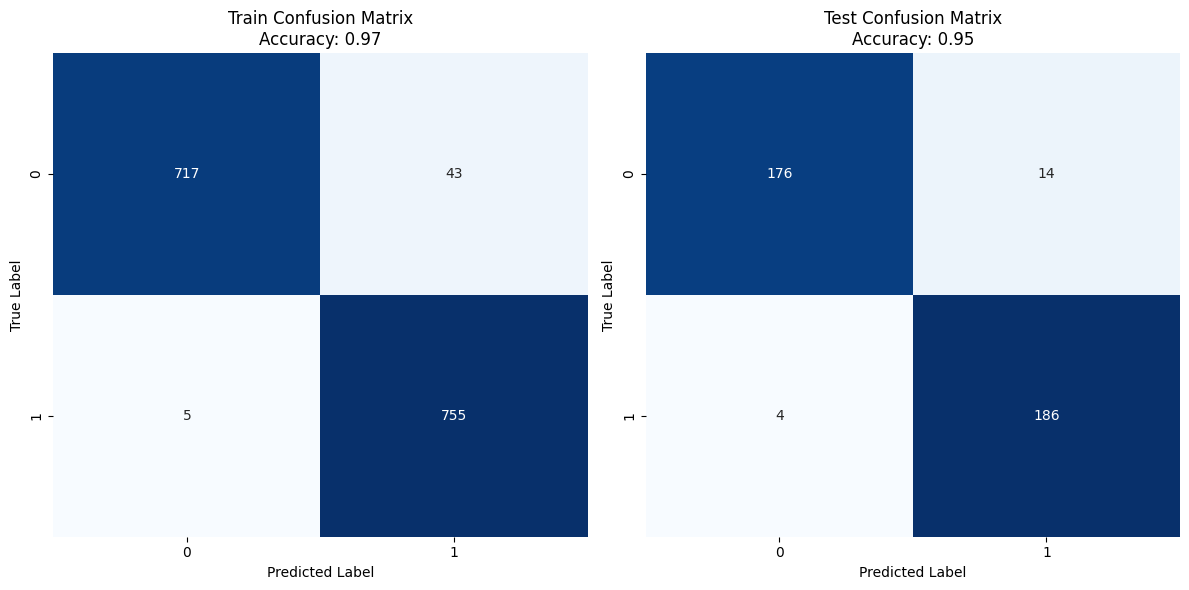

Training Accuracy: 0.968421052631579
Testing Accuracy: 0.9526315789473684


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score

def calculate_precision_recall(conf_matrix):
    # Extract values from confusion matrix
    true_positives = conf_matrix[0, 0]
    false_positives = conf_matrix[0, 1]
    false_negatives = conf_matrix[1, 0]

    # Calculate precision
    precision = true_positives / (true_positives + false_positives)

    # Calculate recall
    recall = true_positives / (true_positives + false_negatives)

    return precision, recall


def calculate_f1_score(precision, recall):
    # Calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score


def evaluate_model(train_dir, test_dir, model_path):
    # Load the model
    model = load_model(model_path)

    # Create data generators
    datagen = ImageDataGenerator(rescale=1./255)

    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),  # Adjust based on your model training input
        batch_size=16,  # Use the same batch size as in training
        class_mode='binary',
        shuffle=False)  # Important to keep shuffle False to match labels

    # test_generator = datagen.flow_from_directory(
    #     test_dir,
    #     target_size=(128, 128),
    #     batch_size=16,
    #     class_mode='binary',
    #     shuffle=False)
    # print(train_generator.classes)
    # print(test_generator.classes)
    # adjusted_test_classes = [label - 1 for label in test_generator.classes]

    test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=16,
        class_mode='binary',
        classes=['fire', 'nofire'],  # Specify the class labels explicitly
        shuffle=False
    )


    # Predicting the data
    train_pred = model.predict(train_generator)
    test_pred = model.predict(test_generator)

    # Convert probabilities to binary outputs
    train_pred_binary = (train_pred > 0.5).astype(np.int32)
    test_pred_binary = (test_pred > 0.5).astype(np.int32)

    # Calculate the accuracy
    train_acc = accuracy_score(train_generator.classes, train_pred_binary)
    test_acc = accuracy_score(test_generator.classes, test_pred_binary)

    # Confusion Matrix calculation
    train_cm = confusion_matrix(train_generator.classes, train_pred_binary)
    test_cm = confusion_matrix(test_generator.classes, test_pred_binary)

    train_precision, train_recall = calculate_precision_recall(train_cm)
    test_precision, test_recall = calculate_precision_recall(test_cm)

    print("Training Precision: ", train_precision)
    print("Training Recall: ", train_recall)
    print("Testing Precision: ", test_precision)
    print("Testing Recall: ", test_recall)


    train_f1_score = calculate_f1_score(train_precision, train_recall)
    test_f1_score = calculate_f1_score(test_precision, test_recall)

    print("Training F1 Score: ", train_f1_score)
    print("Testing F1 Score: ", test_f1_score)


    # Plotting the confusion matrix
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Train Confusion Matrix\nAccuracy: {train_acc:.2f}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.subplot(1, 2, 2)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Test Confusion Matrix\nAccuracy: {test_acc:.2f}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.tight_layout()
    plt.show()

    return train_acc, test_acc

# Example usage:
train_accuracy, test_accuracy = evaluate_model(
    '/content/Forest Fire Dataset/Training',
    '/content/Forest Fire Dataset/Testing',
    '/content/forestfire_detection_model.h5')
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Testing

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model(r'/content/forestfire_detection_model.h5')

def load_and_prepare_image(img_path):
    """
    Loads an image file, converting it to an array that can be used for model prediction.
    """
    img = image.load_img(img_path, target_size=(128, 128))  # Ensure the size matches the input size of the model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch containing a single image
    img_array /= 255.0  # Rescale pixel values to match the training preprocessing
    return img_array

def predict_fire_status(img_path):
    """
    Predicts whether the image is of a 'fire' or 'nofire'.
    """
    img_array = load_and_prepare_image(img_path)
    prediction = model.predict(img_array)
    class_prediction = 'fire' if prediction[0][0] > 0.5 else 'nofire'  # Adjust threshold if necessary
    return class_prediction


In [ ]:
# Example usage
img_path = r'/content/kachori.jpeg'  # Replace with the path to the image you want to classify
result = predict_fire_status(img_path)
print(f'The image is classified as: {result}')

1/1 [==============================] - 0s 19ms/step
The image is classified as: nofire


In [ ]:
# Example usage
img_path = r'/content/pexels-pixabay-51951.jpg'  # Replace with the path to the image you want to classify
result = predict_fire_status(img_path)
print(f'The image is classified as: {result}')

1/1 [==============================] - 0s 18ms/step
The image is classified as: fire


In [ ]:
# Example usage
img_path = r'/content/bonfire.jpeg'  # Replace with the path to the image you want to classify
result = predict_fire_status(img_path)
print(f'The image is classified as: {result}')

1/1 [==============================] - 0s 239ms/step
The image is classified as: nofire
